ML Project Part 2:
Due Thur 5/5
No Late Submissions

**Part 1: Data Preparation**
1. If you are looking at a regression problem, plot the distribution of target values in your
dataset. If classification, plot the distribution of classes. Give a high level summary of
any other pertinent statistics / distributions relevant to your dataset.
2. Look for NA or missing values, impute with a value that makes sense, drop the row as a
last resort.
3. Looking at the non-numeric columns in your dataset, decide which columns should be
kept for model training. (hint: any unique identifiers should be dropped)
4. Of the set of non-numeric columns, decide which should be label-encoded, and which
should be one-hot encoded, and then carry this out on the dataset.
5. Create at least 3 aggregation columns. This could be mean, std deviation, min/max,
counts, and so on of other likely important columns. It is your choice which columns and
which functions. This can easily be done with transforms(as we have done numerous
times before) or pd.agg
6. Provide a brief summary of your logic / justifications for steps 3 & 4.
7. Split your data into features (x_data) and labels (y_data)
8. Using a scaling/normalization library of your choice, scale / normalize your data
9. Split your data into a test and training set randomly, with 10% of the data for the test set.
10. Steps 6,7, and 8 may be done slightly out of order based on your implementation.


*1. If you are looking at a regression problem, plot the distribution of target values in your
dataset. If classification, plot the distribution of classes. Give a high level summary of
any other pertinent statistics / distributions relevant to your dataset.*

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("kddcup99_csv.csv")

In [4]:
catg_cols = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login']
cont_cols = [ 'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

In [5]:
target_variable = 'label'
df.shape

(494020, 42)

In [7]:
df['label'].value_counts() # we are working on binary classification normal/abnormal
# hence group all attacks into the class abnormal


smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

In [8]:
attack_types = list(df['label'].unique())
attack_types.remove('normal') # remove normal from attack types as we only want malware attacks to convert as abnormal

In [9]:
df['label'] = df['label'].replace(attack_types, 'abnormal')

In [10]:
df['label'].value_counts()

abnormal    396743
normal       97277
Name: label, dtype: int64

Text(0.5, 1.0, 'Target Classes Distribution')

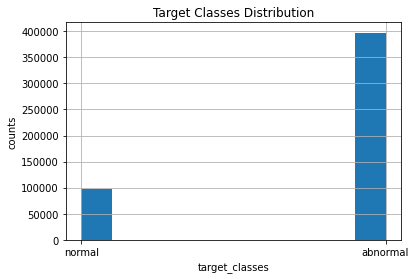

In [11]:
# Target Variable histogram distribution
label_hist_plot = df['label'].hist()
label_hist_plot.set_xlabel('target_classes')
label_hist_plot.set_ylabel('counts')
label_hist_plot.set_title('Target Classes Distribution')

*2. Look for NA or missing values, impute with a value that makes sense, drop the row as a
last resort.*

In [13]:
df.isna().any().all()

False

**Insight**
As seen above there are NA or missing values in the dataset. Therefore, there is no need to try an imputation techniques

*3. Looking at the non-numeric columns in your dataset, decide which columns should be kept for model training. (hint: any unique identifiers should be dropped)*

In [16]:
df[cont_cols].dtypes # verify if all dtypes of numerical(continous) columns are either float or int, otherwise fix them

duration                         int64
src_bytes                        int64
dst_bytes                        int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                   int64
dst_host_srv_count       

In [17]:
df[cont_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494020.0,47.979400,707.747185,0.0,0.00,0.0,0.00,58329.0
src_bytes,494020.0,3025.615744,988219.101230,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494020.0,868.530774,33040.034672,0.0,0.00,0.0,0.00,5155468.0
wrong_fragment,494020.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494020.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494020.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494020.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
num_compromised,494020.0,0.010212,1.798328,0.0,0.00,0.0,0.00,884.0
root_shell,494020.0,0.000111,0.010551,0.0,0.00,0.0,0.00,1.0
su_attempted,494020.0,0.000036,0.007793,0.0,0.00,0.0,0.00,2.0


**Insight**
- As seen from above statistics of the continous variables, the column/feature 'num_outbound_cmds' will be of no use for analysis/prediction since all of its values are 0s

*4. Of the set of non-numeric columns, decide which should be label-encoded, and which should be one-hot encoded, and then carry this out on the dataset.*

In [19]:
for catg_col in catg_cols:
  print(f"Unique values in non-numeric column {catg_col} are {len(df[catg_col].unique())}")

Unique values in non-numeric column protocol_type are 3
Unique values in non-numeric column service are 66
Unique values in non-numeric column flag are 11
Unique values in non-numeric column land are 2
Unique values in non-numeric column logged_in are 2
Unique values in non-numeric column is_host_login are 1
Unique values in non-numeric column is_guest_login are 2


**Insight**: In this case, all the non-numeric columns have less categories. Therefore, we can use one-hot encoding to all of these non-numeric columns and label encoder is not required

*5. Create at least 3 aggregation columns. This could be mean, std deviation, min/max, counts, and so on of other likely important columns. It is your choice which columns and which functions. This can easily be done with transforms(as we have done numerous times before) or pd.agg*

In [21]:
df1 = df.copy() # do not modify original dataset since we will use it for modeling

In [24]:
# 1. Mean duration for each service
df1['mean_service_duration'] = df1['duration'].groupby(df1['service']).transform('mean')
df1[['service', 'mean_service_duration']].sample(5)

,service,mean_service_duration
152007,ecr_i,0.000000
300403,ecr_i,0.000000
143568,smtp,2.841304
413470,ecr_i,0.000000
236979,ecr_i,0.000000


In [27]:
# 2. Number of unique flags for each protocol type
df1['n_flags'] = df1['flag'].groupby(df1['protocol_type']).transform(pd.Series.nunique)
df1[['protocol_type', 'n_flags']].sample(5)

,protocol_type,n_flags
402558,icmp,1
326177,icmp,1
103750,icmp,1
106906,tcp,11
436569,icmp,1


In [28]:
# 3. Standard deviation of src_bytes with in each flag
df1['std_src_bytes'] = df1['src_bytes'].groupby(df1['flag']).transform('std')
df1[['flag', 'std_src_bytes']].sample(5)

,flag,std_src_bytes
464649,REJ,0.000000
401518,SF,65983.358930
406241,SF,65983.358930
376325,S0,0.881447
12698,SF,65983.358930


*6. Provide a brief summary of your logic / justifications for steps 3 & 4.*

- As seen from above statistics of the continous variables, the column/feature 'num_outbound_cmds' will be of no use for analysis/prediction since all of its values are 0s
-  In this case, all the non-numeric columns have less categories. Therefore, we can use one-hot encoding to all of these non-numeric columns and label encoder is not required

**7**. Split your data into features (x_data) and labels (y_data)

**8**. Using a scaling/normalization library of your choice, scale / normalize your data

**9**. Split your data into a test and training set randomly, with 10% of the data for the test set.

**Transform categorical columns (one-hot encoding)**

In [29]:
def convert_categorical_to_one_hot_encoding(dataset, column_name):
    dummy_values = pd.get_dummies(dataset[column_name])
    
    for category in dummy_values.columns:
        dummy_value_name = f"{column_name}-{category}"
        dataset[dummy_value_name] = dummy_values[category]
    dataset.drop(column_name, axis=1, inplace=True)

In [30]:
df['is_host_login'].value_counts()

0    494020
Name: is_host_login, dtype: int64

**Insight**
As seen from above categorical columns distribution, the column/feature 'is_host_login' will not be useful for the prediction as all of its values are 0s.

In [31]:
print(len(catg_cols))
catg_cols.remove('is_host_login')
print(len(catg_cols))

7
6


In [32]:
for cat_col in catg_cols:
    if cat_col != "is_host_login":
        convert_categorical_to_one_hot_encoding(df, cat_col)
df.shape

(494020, 122)

In [35]:
df.head(2) # as seen below one-hot encoded columns were added

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,flag-S2,flag-S3,flag-SF,flag-SH,land-0,land-1,logged_in-0,logged_in-1,is_guest_login-0,is_guest_login-1
0,0,181,5450,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
1,0,239,486,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0


**Transform Numerical columns (Min-Max Normalization)**

In [36]:
cont_cols_new = [each for each in cont_cols if each!='num_outbound_cmds'] # skipping the column num_outbound_cmds it is useless

In [37]:
df_CONTCOLS_MIN = df[cont_cols_new].min(axis=0)
df_CONTCOLS_MAX = df[cont_cols_new].max(axis=0)

In [38]:
df[cont_cols_new] = (df[cont_cols_new] - df_CONTCOLS_MIN) / (df_CONTCOLS_MAX - df_CONTCOLS_MIN)

In [39]:
df[cont_cols_new].head(2)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.035294,0.035294,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0.0,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.074510,0.074510,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0


In [40]:
df.isna().values.any() # making sure there are no NaN values in the dataset

False

**Train-test Split**

In [68]:
df = df.sample(frac=1).reset_index(drop=True) # shuffle the dataset

In [69]:
df['label'].replace(['abnormal','normal'],[0,1],inplace=True) # convert string classes to numerals

In [73]:
df['label'].value_counts()

0    396743
1     97277
Name: label, dtype: int64

In [70]:
X_numpy = df.drop(columns=['label']).to_numpy()
Y_numpy = df['label'].to_numpy()

In [71]:
X_numpy.shape, Y_numpy.shape

((494020, 121), (494020,))

In [72]:
# Split into training and validation, 20% validation set and 80% training 
index_10percent = int(0.1 * len(df.to_numpy()[:, 0]))
print(index_10percent)
XVALID = X_numpy[:index_10percent]
print("XVALID shape : ", XVALID.shape)
YVALID = Y_numpy[:index_10percent]
print("YVALID shape : ", YVALID.shape)
XTRAIN = X_numpy[index_10percent:]
print("XTRAIN shape : ", XTRAIN.shape)
YTRAIN = Y_numpy[index_10percent:]
print("YTRAIN shape : ", YTRAIN.shape)

49402
XVALID shape :  (49402, 121)
YVALID shape :  (49402,)
XTRAIN shape :  (444618, 121)
YTRAIN shape :  (444618,)


## **Part 2: Training:**
1. If you are aiming for classification, import the supervised learning models, linear
regression and decision tree classifier from sklearn. If regression, import linear regression
and logistic regression.
2. Fit / train both models on the training dataset / labels

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [75]:
linear_regression_class = LinearRegression()
decision_tree_class = DecisionTreeClassifier(random_state=42)

In [76]:
linear_regression_class_base_model = linear_regression_class.fit(XTRAIN, YTRAIN)
decision_tree_class_base_model = decision_tree_class.fit(XTRAIN, YTRAIN)


**Part 3: Post Model Analysis**
1. Use model.score on your test set / labels to get an idea of accuracy
2. Print a comparison of the two models’ accuracy
3. Change the distribution of training-test data to 20% test, 30% test.. All the way to 90%
test 10% train. Store this data and plot the relationship between accuracy and percent of
training data.
4. Using a residuals library of your choice, plot the residuals from the linear regression
model. If you chose a classification problem, this plot will look slightly strange.
a. Write a few sentences analyzing this plot.
5. If you chose classification, find a way to plot or visualize the performance of the decision
tree classifier, if regression, do this for the logistic regression model. I expect you to do
your own research on the model and check out a few articles showing how people
typically plot this, and explore the performance on your own. I am giving flexibility here
as long as I see you did some research.
6. Make an argument for which of the two models for the problem type you chose works
better in this case.

1. Use model.score on your test set / labels to get an idea of accuracy
2. Print a comparison of the two models’ accuracy

**Note: Usually, LinearRegression is not used for classification problems. Since the project asked this model peculiarly for the classification problem I am using LinearRegression incase of Logistic Regression problem**

In [79]:
y_pred_linear = linear_regression_class_base_model.predict(XVALID)
y_pred_decision_tree = decision_tree_class_base_model.predict(XVALID)

In [83]:
y_pred_linear

array([-0.00251007, -0.01943207, -0.00251007, ...,  1.02503204,
        0.98532867, -0.0025177 ])

In [86]:
import numpy as np
y_pred_linear_converted_to_binary = np.where(y_pred_linear > 0.5, 1, 0) # assuming 0.5 as the classifier threshold
y_pred_linear_converted_to_binary

array([0, 0, 0, ..., 1, 1, 0])

In [87]:
import sklearn.metrics as skmetrics

In [88]:
print("Classification Metrics of Linear Regression:\n")
print(skmetrics.classification_report(YVALID, y_pred_linear_converted_to_binary))
print("\nClassification Metrics of DecisionTreeClassifier\n")
print(skmetrics.classification_report(YVALID, y_pred_decision_tree))

Classification Metrics of Linear Regression:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     39680
           1       0.97      0.99      0.98      9722

    accuracy                           0.99     49402
   macro avg       0.98      0.99      0.99     49402
weighted avg       0.99      0.99      0.99     49402


Classification Metrics of DecisionTreeClassifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39680
           1       1.00      1.00      1.00      9722

    accuracy                           1.00     49402
   macro avg       1.00      1.00      1.00     49402
weighted avg       1.00      1.00      1.00     49402



In [89]:
print("Confusion Matrix of Logistic Regression:\n")
print(skmetrics.confusion_matrix(YVALID, y_pred_linear_converted_to_binary))
print("\nConfusion Matrix of DecisionTreeClassifier\n")
print(skmetrics.confusion_matrix(YVALID, y_pred_decision_tree))

Confusion Matrix of Logistic Regression:

[[39345   335]
 [   92  9630]]

Confusion Matrix of DecisionTreeClassifier

[[39674     6]
 [   12  9710]]


In [90]:
print("Accuracy %  of Linear Regression:\n")
print(round(skmetrics.accuracy_score(YVALID, y_pred_linear_converted_to_binary),4) * 100, "%")
print("\nAccuracy % of DecisionTreeClassifier\n")
print(round(skmetrics.accuracy_score(YVALID, y_pred_decision_tree),4) * 100, "%")

Accuracy %  of Linear Regression:

99.14 %

Accuracy % of DecisionTreeClassifier

99.96000000000001 %


*4. Using a residuals library of your choice, plot the residuals from the linear regression model. If you chose a classification problem, this plot will look slightly strange. a. Write a few sentences analyzing this plot.*


In [95]:
#pip install yellowbrick - library to plot residual plot

In [96]:
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot

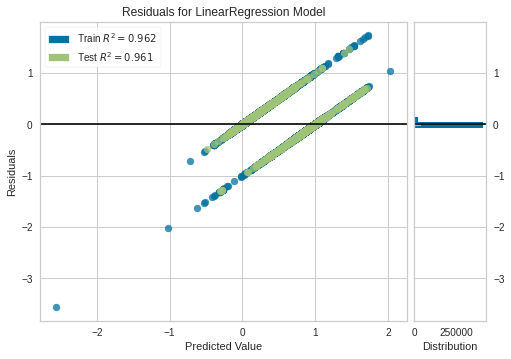

In [97]:
visualizer = ResidualsPlot(linear_regression_class)

visualizer.fit(XTRAIN, YTRAIN)  # Fit the training data to the visualizer
visualizer.score(XVALID, YVALID)  # Evaluate the model on the test data
visualizer.show()       

**Insight**: As seen in the above plot, the plot is distributed between -1 and 1 since the predicted values range from -1 to 1. The R2 value looks good. Also, the histogram distribution is restricted to 0-1

*5.If you chose classification, find a way to plot or visualize the performance of the decision tree classifier, if regression, do this for the logistic regression model. I expect you to do your own research on the model and check out a few articles showing how people typically plot this, and explore the performance on your own. I am giving flexibility here as long as I see you did some research.*

In [98]:
from sklearn.tree import plot_tree

[Text(0.8536490456678789, 0.9852941176470589, 'X[16] <= 0.093\ngini = 0.316\nsamples = 444618\nvalue = [357063, 87555]'),
 Text(0.7466139946186358, 0.9558823529411765, 'X[5] <= 0.017\ngini = 0.15\nsamples = 94011\nvalue = [7701, 86310]'),
 Text(0.6662179636819343, 0.9264705882352942, 'X[19] <= 0.545\ngini = 0.11\nsamples = 91160\nvalue = [5345, 85815]'),
 Text(0.5997840696874386, 0.8970588235294118, 'X[30] <= 0.49\ngini = 0.077\nsamples = 89366\nvalue = [3578, 85788]'),
 Text(0.532966999213682, 0.8676470588235294, 'X[108] <= 0.5\ngini = 0.054\nsamples = 88164\nvalue = [2466, 85698]'),
 Text(0.4370761254177315, 0.8382352941176471, 'X[3] <= 0.167\ngini = 0.04\nsamples = 87483\nvalue = [1807, 85676]'),
 Text(0.430785580892471, 0.8088235294117647, 'X[29] <= 0.995\ngini = 0.029\nsamples = 86958\nvalue = [1282, 85676]'),
 Text(0.2916871436996265, 0.7794117647058824, 'X[22] <= 0.195\ngini = 0.008\nsamples = 81431\nvalue = [308, 81123]'),
 Text(0.2405764694318852, 0.75, 'X[33] <= 0.015\ngini =

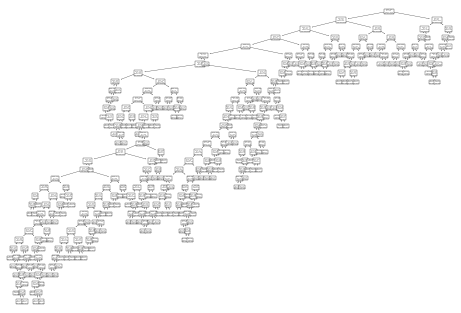

In [99]:
plot_tree(decision_tree_class_base_model)

*3. Change the distribution of training-test data to 20% test, 30% test.. All the way to 90% test 10% train. Store this data and plot the relationship between accuracy and percent of training data.*

In [112]:
model_selection_df = pd.DataFrame()

In [113]:
test_set_percentages = np.arange(0.1,1.0,0.1)
test_set_percentages

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [117]:
def build_and_evaluate_model(percentage_val):
    print(f"Test set percentage {int(percentage_val * 100)}%, Train set percentages {int((1-percentage_val) * 100)}")
    index_percent = int(percentage_val * len(df.to_numpy()[:, 0]))
    print(index_percent)
    XVALID = X_numpy[:index_percent]
    #print("XVALID shape : ", XVALID.shape)
    YVALID = Y_numpy[:index_percent]
    #print("YVALID shape : ", YVALID.shape)
    XTRAIN = X_numpy[index_percent:]
    print("XTRAIN shape : ", XTRAIN.shape)
    YTRAIN = Y_numpy[index_percent:]
    print("YTRAIN shape : ", YTRAIN.shape)
    decision_tree_class_candidate_model = decision_tree_class.fit(XTRAIN, YTRAIN)
    y_pred_decision_tree_candidate = decision_tree_class_base_model.predict(XVALID)
    accuracy_val = skmetrics.accuracy_score(YVALID, y_pred_decision_tree_candidate)
    return round(accuracy_val,4)

In [118]:
for idx, test_percent in enumerate(test_set_percentages):
  model_selection_df.loc[idx, 'train_percentage'] = str(int((1-test_percent)*100)) + "%"
  model_selection_df.loc[idx, 'test_percentage'] = str(int(test_percent * 100)) + "%"
  this_acc = build_and_evaluate_model(test_percent)
  model_selection_df.loc[idx, 'Accuracy_Percent'] = this_acc * 100


Test set percentage 10%, Train set percentages 90
49402
XTRAIN shape :  (444618, 121)
YTRAIN shape :  (444618,)
Test set percentage 20%, Train set percentages 80
98804
XTRAIN shape :  (395216, 121)
YTRAIN shape :  (395216,)
Test set percentage 30%, Train set percentages 70
148206
XTRAIN shape :  (345814, 121)
YTRAIN shape :  (345814,)
Test set percentage 40%, Train set percentages 60
197608
XTRAIN shape :  (296412, 121)
YTRAIN shape :  (296412,)
Test set percentage 50%, Train set percentages 50
247010
XTRAIN shape :  (247010, 121)
YTRAIN shape :  (247010,)
Test set percentage 60%, Train set percentages 40
296412
XTRAIN shape :  (197608, 121)
YTRAIN shape :  (197608,)
Test set percentage 70%, Train set percentages 29
345814
XTRAIN shape :  (148206, 121)
YTRAIN shape :  (148206,)
Test set percentage 80%, Train set percentages 19
395216
XTRAIN shape :  (98804, 121)
YTRAIN shape :  (98804,)
Test set percentage 90%, Train set percentages 9
444618
XTRAIN shape :  (49402, 121)
YTRAIN shape : 

In [119]:
model_selection_df

,train_percentage,test_percentage,Accuracy_Percent
0,90%,10%,99.96
1,80%,20%,99.97
2,70%,30%,99.97
3,60%,40%,99.96
4,50%,50%,99.96
5,40%,60%,99.93
6,29%,70%,99.94
7,19%,80%,99.93
8,9%,90%,99.91


**Insight**: As seen above there is not much deviation with the change in the train and test percentages. However, it is good to know that the model is well adjusting to the given dataset. Ideally 70-30 split would be a good genralization

*6. Make an argument for which of the two models for the problem type you chose works
better in this case.*

**Insight**: DecisionTreeClassifier is performing better than linear regression interms of accuracy. For this type of dataset where there is no relationship between the input features, DecisioTreeClassifier would be a goodfit. Since, DecisionTreeClassifier as overfitting problems, RandomForestClassifier will be a good ensemble technique which brings the genralization

**Part-4 and Part -5 Done**